In [8]:
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [9]:
#2.1
ways = np.array([0, 3, 8, 9, 0])
ways/ways.sum()

array([0.  , 0.15, 0.4 , 0.45, 0.  ])

In [10]:
#2.2
probability = stats.binom.pmf(6, n=9, p=0.5)
probability
# the relative number of ways to get 6 water, holding p at 0.5 and N = Water + Land = 9

0.16406250000000003

In [11]:
np.repeat(5, 5)

array([5, 5, 5, 5, 5])

In [12]:
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [13]:
#2.3 
def posterior_grid_approx(grid_points = 5, success = 6, tosses = 9): 
# Step 1 - Define the grid. This means you decide how many points to use in estimating the posterior, 
# and then you make a list of the parameter values on the grid
    p_grid = np.linspace(0, 1, grid_points)

# define the prior - compute the value of the prior at each parameter value on the grid. 
    prior = np.repeat(5, grid_points)

# compute likelihood at each value in grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

# compute product of likelihood and prior
    unstd_posterior = likelihood * prior

# standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

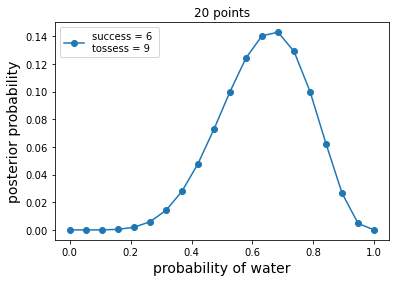

In [14]:
#code 2.3
points = 20
w, n = 6, 9
p_grid, posterior = posterior_grid_approx(points, w, n)

plt.plot( p_grid, posterior, 'o-', label = f'success = {w} \ntossess = {n}')
plt.xlabel('probability of water', fontsize = 14)
plt.ylabel('posterior probability', fontsize = 14)
plt.title(f'{points} points')
plt.legend(loc = 0)

In [15]:
np.repeat( (0,1), (3,6) )

array([0, 0, 0, 1, 1, 1, 1, 1, 1])

In [16]:
#2.6 computing the posterior using the quadratic approximation

data = np.repeat( (0,1), (3,6) )
with pm.Model() as normal_aproximation:
    p = pm.Uniform('p', 0, 1) #uniform prior
    w = pm.Binomial('w', n = len(data), p=p, observed = data.sum()) # binomial likelihood
    mean_q = pm.find_MAP()
    std_q = ( ( 1/pm.find_hessian(mean_q, vars = [p]) ) ** 0.5)[0]
mean_q['p'], std_q  

(array(0.66666667), array([0.15713484]))

In [17]:
norm = stats.norm(mean_q, std_q)
prob = 0.89 #89% percentile interval 
z = stats.norm.ppf([(1-prob)/2, (1+prob)/2])
pi = mean_q['p'] + std_q * z
pi

array([0.41553484, 0.91779849])

After all calculations of 2.6, we would say
"Assuming the posterior is Gaussian, it is maximized at mean = .67, and its standard deviation is std = 0.16" 

Text(0, 0.5, 'Density')

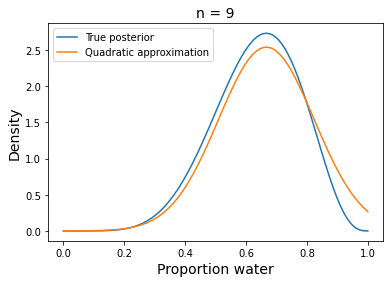

In [20]:
#2.7 
# Analytical Calculation
w, n = 6,9
x = np.linspace(0,1,100)
plt.plot(x, stats.beta.pdf(x, w+1, n-w+1), 
    label = 'True posterior')

#quadratic approximation
plt.plot(x, stats.norm.pdf(x, mean_q['p'], std_q), 
        label = 'Quadratic approximation')

plt.legend(loc = 2, fontsize = 10)
plt.title(f'n = {n}', fontsize = 14)
plt.xlabel('Proportion water', fontsize = 14)
plt.ylabel('Density', fontsize = 14)